# 0. Before Running

Before running the code in this notebook, please ensure that the following modules are installed correctly:
- geopandas 0.7.0
- descartes 1.1.0
- pydotplus 2.0.2

These can be installed using the following commands in Anaconda Prompt: <br>
`conda install -c conda-forge geopandas` <br>
`conda install -c conda-forge descartes` <br>
`conda install pydotplus` <br>

Note that a virtual environment might need to be created as the dependencies for geopandas sometimes does not install correctly unless a clean anaconda distribution of python is not used. Use the following command in Anaconda Prompt:<br>
`conda create -n new_env python=3.7 anaconda` <br>

Then install the above mentioned modules in this environment and run this notebook in the newly created environment.

# 1. Import Modules

In [1]:
# the following module contains long functions made by me to import data and 
# plot coloured maps of gespacial data. These were stored separately to avoid
# cluttering this main notebook
import my_project_helper_functions as mhf

In [2]:
# import more modules
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Construct Dataset

## 2.1 Geospatial Data from Open Africa
The following geospatial data was downloaded from https://africaopendata.org/dataset/department-of-agriculture-fisheries-and-forestry-south-african-environmental-gis-data. The dataset was constructed by the Department of Agriculture, Fisheries and Forestry - South African Environmental GIS Data. The two categories from in this data set was Biome and Runoff.

### 2.1.1 Biome

In [3]:
# load data
biomes_data = mhf.load_biomes_data('../Data/maps from open africa/South Africa - Biomes/RSA_biome.shp')
biomes_data.head()

,BIOME,geometry
0,Savanna,"POLYGON ((29.69195 -29.80379, 29.69411 -29.800..."
1,Savanna,"POLYGON ((28.80475 -31.75144, 28.81063 -31.755..."
2,Savanna,"POLYGON ((30.80244 -29.76348, 30.80787 -29.758..."
3,Savanna,"POLYGON ((30.13110 -30.05807, 30.14399 -30.044..."
4,Savanna,"POLYGON ((30.23113 -30.65386, 30.25002 -30.659..."


figure saved at: ../Data/output_figures/biomes_plot.png


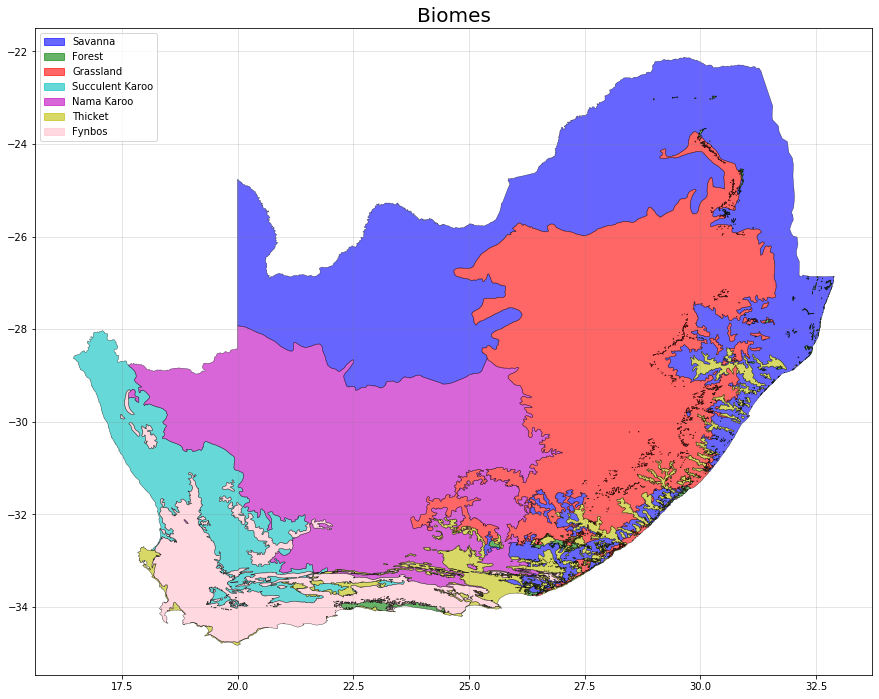

In [4]:
# plot data
mhf.plot_biomes(biomes_data, plot_type='all_colour', save_plot_dir='../Data/output_figures/biomes_plot.png')

### 2.1.2 Runoff

In [5]:
runoff_data = mhf.load_runoff_data('../Data/maps from open africa/South Africa - Runoff/RSA_runperc.shp')
runoff_data.head()

,RUNOFFPERC,geometry
0,0.14,"POLYGON ((29.35999 -22.19793, 29.36037 -22.197..."
1,0.61,"POLYGON ((28.51104 -22.58897, 28.51184 -22.588..."
2,0.22,"POLYGON ((30.12991 -22.31034, 30.12992 -22.310..."
3,1.00,"POLYGON ((30.76149 -22.30477, 30.76321 -22.304..."
4,0.29,"POLYGON ((27.78322 -23.17329, 27.78422 -23.171..."


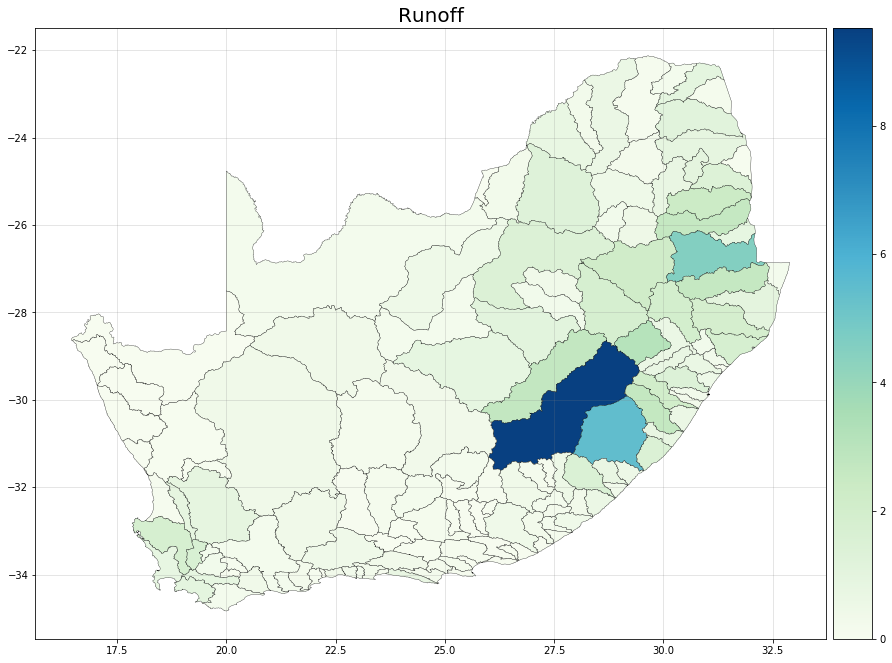

In [6]:
mhf.plot_runoff(runoff_data, plot_type='all_colour')

## 2.2 Geospatial Data from ISRIC SOTER Database
The following geospatial data was downloaded from https://data.isric.org/geonetwork/srv/eng/catalog.search#/metadata/c3f7cfd5-1f25-4da1-bce9-cdcdd8c1a9a9. The dataset was constructed as part of the Soil and Terrain (SOTER) database programme by the International Soil Reference and Information Centre (ISRIC).

### 2.2.1 From SOTER Database SQL Query
The SOTER database contains a relational database with soil information. This soil information is liked to polygons in a shapefile through an ID column. To assemble the requred data in a format to use for the rest of this project, an SQL query was created to give the soil information contained in the database with its ID. The reational database can be found in the following folder: `../Data/maps from isric.org - soilatlas/SOTER_ZA/Database`

The SQL query used to do this was: <br>
`SELECT Profile.PRID, SoilComponent.SUID, Profile.LNGI, Profile.LATI, Profile.ELEV, Profile.DRAI, RepresentativeHorizonValues.SDTO, RepresentativeHorizonValues.STPC, RepresentativeHorizonValues.CLPC, RepresentativeHorizonValues.MCT1, RepresentativeHorizonValues.MCT5, RepresentativeHorizonValues.ELCO, RepresentativeHorizonValues.EXCA, RepresentativeHorizonValues.EXMG, RepresentativeHorizonValues.EXNA, RepresentativeHorizonValues.EXCK, RepresentativeHorizonValues.EXAL, Terrain.MNEL, Terrain.MXEL, Terrain.RELI, Terrain.LNDF, Terrain.LITH, TerrainComponentData.BEDR, Vegetation.VEGE, Vegetation.PROP
FROM (TerrainComponentData INNER JOIN ((Terrain INNER JOIN TerrainComponent ON Terrain.SUID = TerrainComponent.SUID) INNER JOIN ((Profile INNER JOIN RepresentativeHorizonValues ON Profile.PRID = RepresentativeHorizonValues.PRID) INNER JOIN SoilComponent ON Profile.PRID = SoilComponent.PRID) ON (TerrainComponent.TCID = SoilComponent.TCID) AND (TerrainComponent.SUID = SoilComponent.SUID)) ON TerrainComponentData.TCDC = TerrainComponent.TCDC) INNER JOIN Vegetation ON Terrain.SUID = Vegetation.SUID;
`
<br>

This produced an answer that was saved in Excel format as _mother_query_SOTER_ZA_18_03_2020_1656_adj_cols.xlsx_ at `../Data/maps from isric.org - soilatlas/SOTER_ZA/mother_query_SOTER_ZA_18_03_2020_1656_adj_cols.xlsx`. The query answer can be loaded and inspected as follows:

In [7]:
mother_query_dir = '../Data/maps from isric.org - soilatlas/SOTER_ZA/mother_query_SOTER_ZA_18_03_2020_1656_adj_cols.xlsx'
mother_query_df = pd.read_excel(mother_query_dir)
mother_query_df.head()

,PROF_ID,SOTER_ID,LNGI,LATI,ELEV,DRAIN,SAND,SILT,CLAY,MOIST_FC,...,K,AL,MIN_EL,MAX_EL,RELIEF_I,LANDFORM,LITHOLOGY,BEDROCK_DEPTH,VEGETATION,PROPORTION
0,ZAV/4/20/CMca,1,NaN,NaN,NaN,W,NaN,NaN,NaN,NaN,...,NaN,NaN,481,563,12,LV,SC2,1.089,II,10
1,ZAV/4/20/CMca,1,NaN,NaN,NaN,W,NaN,NaN,NaN,NaN,...,NaN,NaN,481,563,12,LV,SC2,1.089,IIIB,43
2,ZAV/4/20/CMca,1,NaN,NaN,NaN,W,NaN,NaN,NaN,NaN,...,NaN,NaN,481,563,12,LV,SC2,1.089,II,10
3,ZAV/4/20/CMca,1,NaN,NaN,NaN,W,NaN,NaN,NaN,NaN,...,NaN,NaN,481,563,12,LV,SC2,1.089,IIIB,43
4,ZAV/4/20/LVcr,1,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,...,NaN,NaN,481,563,12,LV,SC2,1.089,II,10


### 2.2.2 Include SOTER Shape File and Combine
By inspecting the above Excel file containing the the soil information of the SOTER database from the SQL query, it is clear that some information is missing for some regions (NaN values). The following step was done to merge the columns that contain values (exclude all NaN-containing columns) with the geometry data in the shapefile to create the final useable dataframe containing useful SOTER data.

In [8]:
sahpefile_dir = '../Data/maps from isric.org - soilatlas/SOTER_ZA/GIS/SOTER/ZA_SOTERv1.shp'
soter_data = mhf.load_soter_data(sahpefile_dir, mother_query_dir)
soter_data.head()

,LITHOLOGY,LANDFORM,SOIL,RELIEF_I,BEDROCK_DEPTH,geometry
SOTER_ID,,,,,,
1,SC2,LV,CMc,12,1.08900,"POLYGON ((29.64801 -22.12661, 29.65635 -22.129..."
2,MA2,LV,CMx,31,0.37222,"POLYGON ((29.70625 -22.13980, 29.71462 -22.142..."
3,SC3,LP,LVh,13,0.68200,"POLYGON ((29.64375 -22.17655, 29.63745 -22.178..."
4,MA2,LP,CMx,24,0.37222,"POLYGON ((29.70749 -22.18912, 29.70878 -22.187..."
5,SC,LV,CMc,12,1.08900,"POLYGON ((29.18913 -22.18512, 29.20011 -22.181..."


## 2.3 Collect Geospatial Information Given Coordinates
The layers of geospatial information (biome, runoff, lithology, landform, soil type, relief index, and bedrock depth) is now contained in the dataframes constructed above. From here, any coordinates can be input and the information contained in these layers can be retrieved for a specific location. This process is shown below for some example coordinates:

### 2.3.1 Get Coordinates
The coordinates of the locations where soil resistivity measurements were performed can be loaded as follows:

In [9]:
inp_coords_1 = mhf.get_coord_table_from_excel('../Data/soil resisitivity measurement data/Theunus Marais/MY_SUMMARY.xlsx')
inp_coords_2 = mhf.get_coord_table_from_excel('../Data/soil resisitivity measurement data/Ivan Grobbelaar/MY_SUMMARY.xlsx')
inp_coords_3 = mhf.get_coord_table_from_excel('../Data/soil resisitivity measurement data/Johann, EPCM Solutions/MY_SUMMARY.xlsx')
inp_coords_4 = mhf.get_coord_table_from_excel('../Data/soil resisitivity measurement data/Trevor Manas/MY_SUMMARY.xlsx')
inp_coords_5 = mhf.get_coord_table_from_excel('../Data/soil resisitivity measurement data/Barry Reid/MY_SUMMARY.xlsx')
inp_coords_6 = mhf.get_coord_table_from_excel('../Data/soil resisitivity measurement data/Gary Thoresson/MY_SUMMARY.xlsx')
inp_coords_7 = mhf.get_coord_table_from_excel('../Data/soil resisitivity measurement data/PHP, Terratech/MY_SUMMARY.xlsx')

inp_coords = pd.concat([inp_coords_1, inp_coords_2,inp_coords_3,inp_coords_4,inp_coords_5,inp_coords_6,inp_coords_7], ignore_index=True)

print('number of input coordinates:', inp_coords.shape[0])
inp_coords.head()

number of input coordinates: 60


,Name,x,y,geometry
0,tm_ec,27.934969,-32.951264,POINT (27.93497 -32.95126)
1,tm_nc,24.785278,-28.806111,POINT (24.78528 -28.80611)
2,tm_wc,18.695400,-33.810197,POINT (18.69540 -33.81020)
3,tm_lim,29.405300,-23.893700,POINT (29.40530 -23.89370)
4,tm_gp,27.874419,-26.146342,POINT (27.87442 -26.14634)


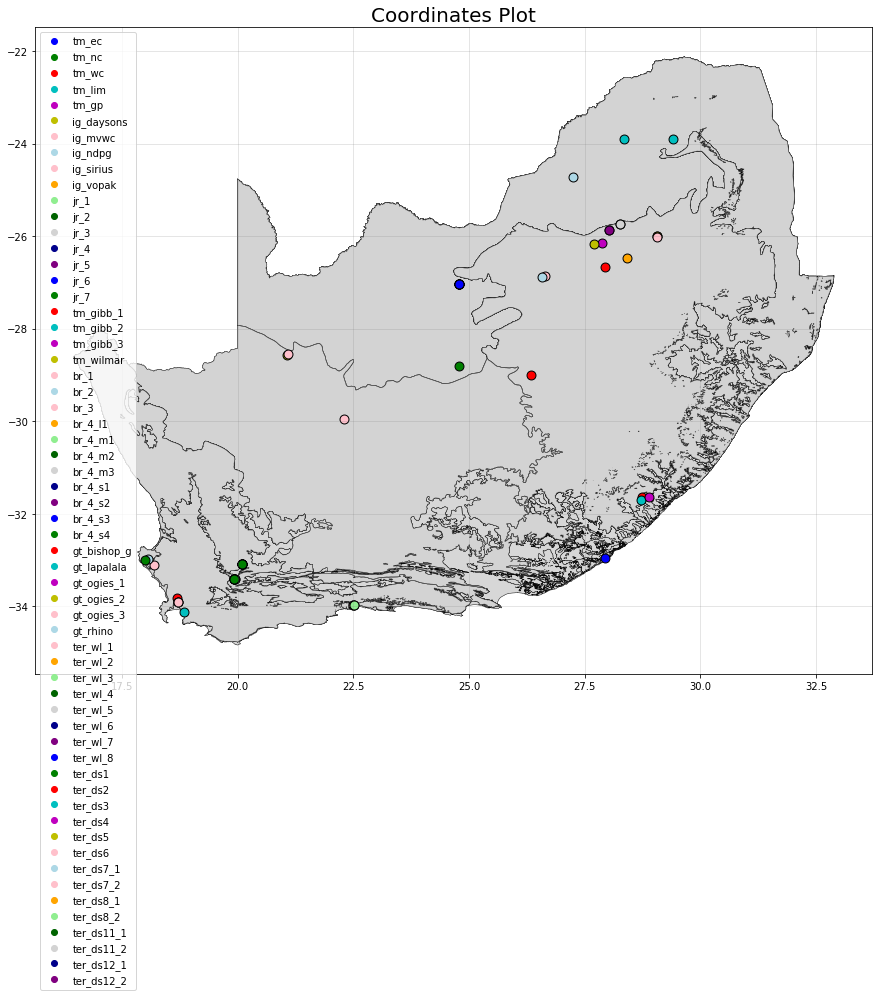

In [10]:
# plot coordinates on map of SA
mhf.plot_inp_coords_location_from_coord_table(inp_coords)

### 2.3.2 Collect Geospatial Data for Coordinates
The value of each layer of geospatial data (biome, runoff, lithology, landform, soil type, relief index, and bedrock depth) will be returned for all coordinates

In [11]:
# get biome, runoff, lithology, landform, soil type, relief index, and bedrock depth data for coordinates
biomes_data_summary = mhf.get_biomes_data(biomes_data, inp_coords)
runoff_data_summary = mhf.get_runoff_data(runoff_data, inp_coords)
soter_data_summary, validity_index = mhf.get_soter_data(soter_data, inp_coords)

j= 0 : tm_ec
	 inp coord located
j= 1 : tm_nc
	 inp coord located
j= 2 : tm_wc
	 inp coord located
		 coord found within poly at: 2888
j= 3 : tm_lim
	 inp coord located
		 coord found within poly at: 211
j= 4 : tm_gp
	 inp coord located
		 coord found within poly at: 703
j= 5 : ig_daysons
	 inp coord located
		 coord found within poly at: 1195
j= 6 : ig_mvwc
	 inp coord located
		 coord found within poly at: 770
j= 7 : ig_ndpg
	 inp coord located
		 coord found within poly at: 770
j= 8 : ig_sirius
	 inp coord located
		 coord found within poly at: 1195
j= 9 : ig_vopak
	 inp coord located
		 coord found within poly at: 603
j= 10 : jr_1
	 inp coord located
		 coord found within poly at: 2637
j= 11 : jr_2
	 inp coord located
		 coord found within poly at: 2637
j= 12 : jr_3
	 inp coord located
		 coord found within poly at: 2637
j= 13 : jr_4
	 inp coord located
		 coord found within poly at: 2637
j= 14 : jr_5
	 inp coord located
		 coord found within poly at: 2637
j= 15 : jr_6
	 inp coord 

### 2.3.3 Drop Invalid Rows
NOTE: The SOTER database contains polygons that refer to bodies of water. These need to be dropped. That is what the validity index and invalid points in the previous code cell refer to. The following section of code will remove any rows from the dataframe where the coordinates correspond to these areas of water.

In [12]:
validity_df = pd.DataFrame(validity_index)
#validity_df.head()

In [13]:
validity_df = pd.DataFrame(validity_index)

invalid_rows_maks = np.array(validity_df==-1).tolist()
valid_rows_maks = np.array(validity_df!=-1).tolist()

invalid_rows = soter_data_summary.iloc[invalid_rows_maks]

soter_data_summary.drop(invalid_rows.index , inplace=True)
soter_data_summary.head()

,Name,x,y,BEDROCK_DEPTH,LANDFORM,LITHOLOGY,SOIL,RELIEF_I,geometry
2,tm_wc,18.695400,-33.810197,0.97125,SP,SC4,ARa,24.0,"POLYGON ((18.66973 -33.87906, 18.67079 -33.875..."
3,tm_lim,29.405300,-23.893700,0.59600,SP,MA2,LXh,43.0,"POLYGON ((29.31089 -23.84511, 29.31801 -23.843..."
4,tm_gp,27.874419,-26.146342,0.53533,TV,MA1,LXh,40.0,"POLYGON ((28.12684 -26.16799, 28.12844 -26.167..."
5,ig_daysons,21.075092,-28.569844,0.33361,LP,UE,CMx,16.0,"POLYGON ((21.18650 -28.48375, 21.18765 -28.482..."
6,ig_mvwc,26.633661,-26.859803,0.38881,LP,II1,LPq,16.0,"POLYGON ((26.67144 -26.60989, 26.67713 -26.609..."


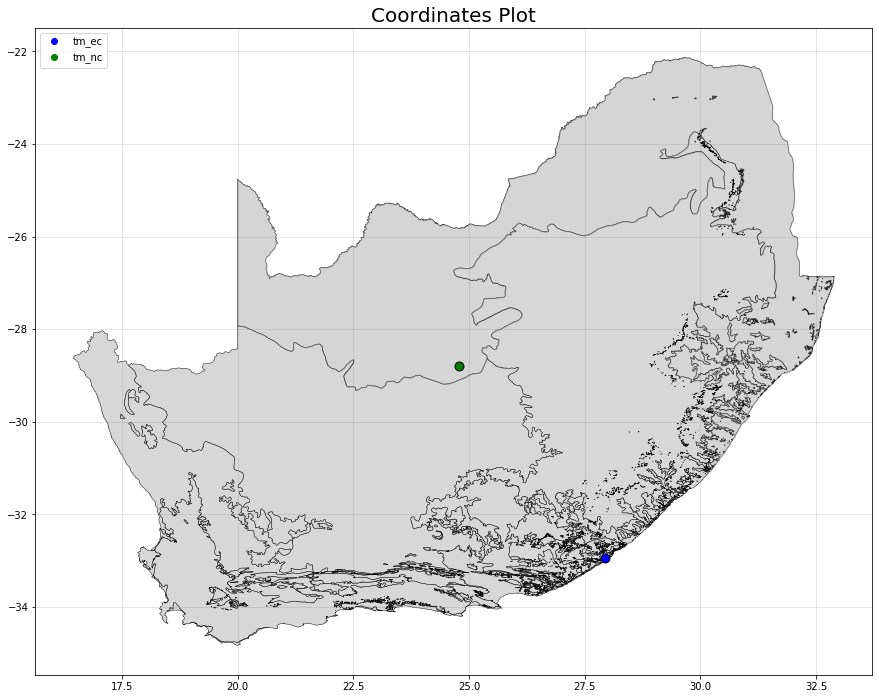

In [14]:
# plot invalid points (these were dropped)
mhf.plot_inp_coords_location_from_coord_table(gpd.GeoDataFrame(inp_coords.iloc[invalid_rows_maks]))

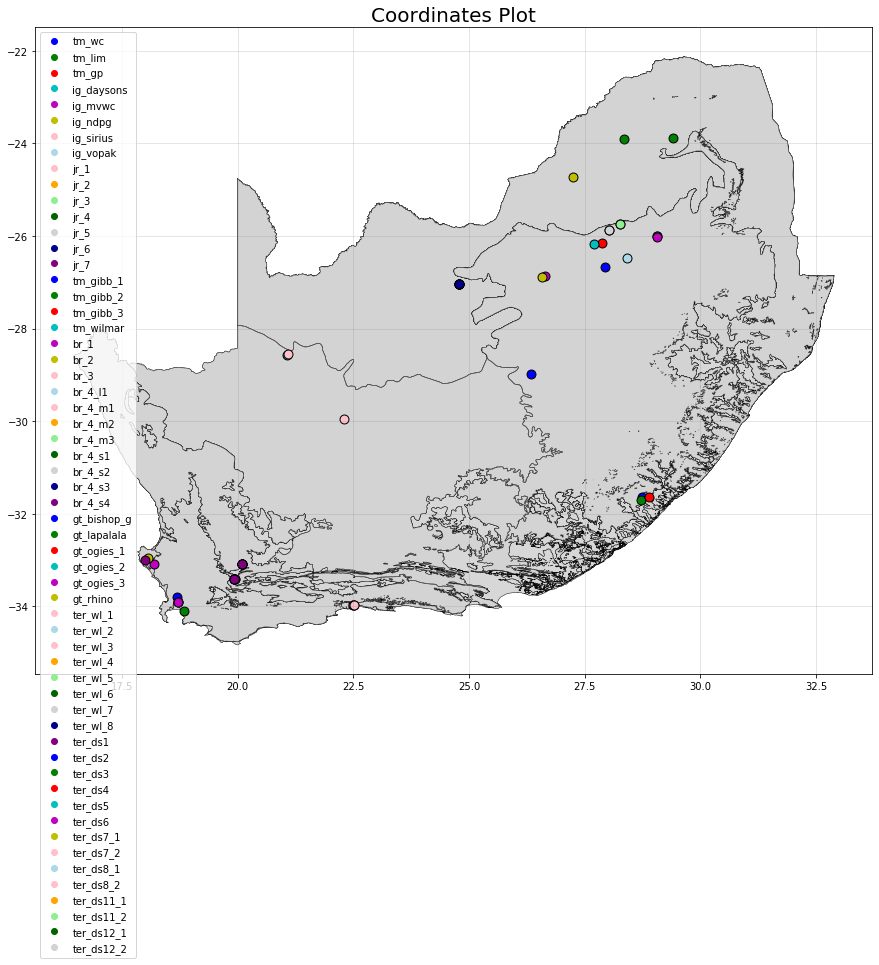

In [15]:
# plot valid points - these will be used in the rest of the study
valid_coords_gpd = gpd.GeoDataFrame(inp_coords.iloc[valid_rows_maks])
valid_coords_gpd = valid_coords_gpd.set_index('Name').reset_index()
mhf.plot_inp_coords_location_from_coord_table(valid_coords_gpd)

### 2.3.4 Join Geospatial Dataframes
Now join all the geospatial dataframes (from Open Africa and SOTER) together to show all availible information for each coordinate

In [16]:
# drop columns
biomes_data_summary = biomes_data_summary.drop(columns=['x','y','geometry'])
runoff_data_summary = runoff_data_summary.drop(columns=['x','y','geometry'])
soter_data_summary = soter_data_summary.drop(columns=['x','y','geometry'])

# set index to 'Name' column
biomes_data_summary = biomes_data_summary.set_index('Name')
runoff_data_summary = runoff_data_summary.set_index('Name')
soter_data_summary = soter_data_summary.set_index('Name')

# join into final dataframe
data = soter_data_summary.join(runoff_data_summary).join(biomes_data_summary)
data.head()

,BEDROCK_DEPTH,LANDFORM,LITHOLOGY,SOIL,RELIEF_I,RUNOFFPERC,BIOME
Name,,,,,,,
tm_wc,0.97125,SP,SC4,ARa,24.0,0.85,Fynbos
tm_lim,0.59600,SP,MA2,LXh,43.0,0.14,Savanna
tm_gp,0.53533,TV,MA1,LXh,40.0,1.48,Grassland
ig_daysons,0.33361,LP,UE,CMx,16.0,0.39,Nama Karoo
ig_mvwc,0.38881,LP,II1,LPq,16.0,1.48,Grassland


### 2.3.5 Data Exploration - Numerical Values
The following plots can give an idea of the values of the numerical features of the data

In [17]:
data.describe()

,BEDROCK_DEPTH,RELIEF_I,RUNOFFPERC
count,58.000000,58.000000,58.000000
mean,0.511792,38.258621,0.764655
std,0.320258,26.655410,0.478566
min,0.096810,8.000000,0.140000
25%,0.158423,23.000000,0.360000
50%,0.452550,24.000000,0.750000
75%,0.811320,52.000000,0.920000
max,1.041750,89.000000,1.790000


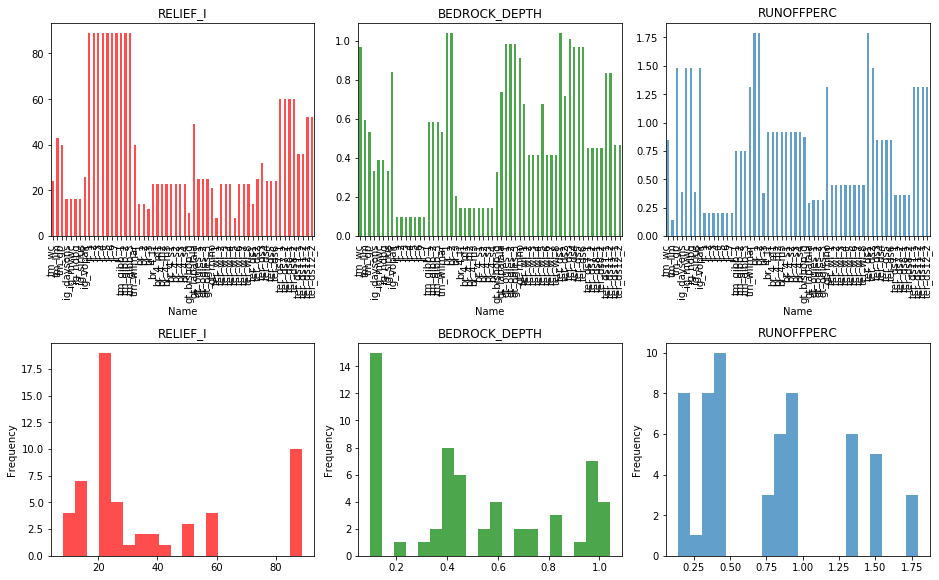

In [18]:
fig = plt.figure(figsize=(13,8))
plt.subplot(2, 3, 1)
data['RELIEF_I'].plot(kind='bar',title='RELIEF_I',color='r',alpha=0.7);
plt.subplot(2, 3, 4)
data['RELIEF_I'].plot(kind='hist',bins=20,title='RELIEF_I',color='r',alpha=0.7);

plt.subplot(2, 3, 2)
data['BEDROCK_DEPTH'].plot(kind='bar',title='BEDROCK_DEPTH',color='g',alpha=0.7);
plt.subplot(2, 3, 5)
data['BEDROCK_DEPTH'].plot(kind='hist',bins=20,title='BEDROCK_DEPTH',color='g',alpha=0.7);

plt.subplot(2, 3, 3)
data['RUNOFFPERC'].plot(kind='bar',title='RUNOFFPERC',alpha=0.7);
plt.subplot(2, 3, 6)
data['RUNOFFPERC'].plot(kind='hist',bins=20,title='RUNOFFPERC',alpha=0.7);

plt.tight_layout(pad=0.5, w_pad=1, h_pad=1)

## 2.4 Add Three-Layer Soil Resistivity Data to Dataframe
In this step, the soil resistivity data will be added to the dataframe that contains geospatial data. This data consisits of three 1m deep layers (*rho_1, rho_2*, and *rho_3*) constructed using SES CEDEGS software. This three-layer soil model was produced using actual soil resistivity measurements taken around South Africa using the Wenner method. I was personally involved in taking some of these measurements. Due to the time consuming nature of this data collection, I also used some data collected by others. I want to thank the following people who contributed by shareing soil resistivity measurement data:
- Barry Reid from Royal Haskoning DHV
- Gary Thoresson from The Testing Guys
- Ivan Grobbelaar from DEHN Africa
- Johann Rossouw from EPCM Solutions
- Dr. Pieter Pretorius from Terratech
- Theunus Marais from Eskom
- Trevor Manas from LP Concepts

In [19]:
# import soil resistivity data
res_table_1 = mhf.get_resistivity_table_from_excel('../Data/soil resisitivity measurement data/Theunus Marais/MY_SUMMARY.xlsx')
res_table_2 = mhf.get_resistivity_table_from_excel('../Data/soil resisitivity measurement data/Ivan Grobbelaar/MY_SUMMARY.xlsx')
res_table_3 = mhf.get_resistivity_table_from_excel('../Data/soil resisitivity measurement data/Johann, EPCM Solutions/MY_SUMMARY.xlsx')
res_table_4 = mhf.get_resistivity_table_from_excel('../Data/soil resisitivity measurement data/Trevor Manas/MY_SUMMARY.xlsx')
res_table_5 = mhf.get_resistivity_table_from_excel('../Data/soil resisitivity measurement data/Barry Reid/MY_SUMMARY.xlsx')
res_table_6 = mhf.get_resistivity_table_from_excel('../Data/soil resisitivity measurement data/Gary Thoresson/MY_SUMMARY.xlsx')
res_table_7 = mhf.get_resistivity_table_from_excel('../Data/soil resisitivity measurement data/PHP, Terratech/MY_SUMMARY.xlsx')

res_table = pd.concat([res_table_1,res_table_2,res_table_3,res_table_4,res_table_5,res_table_6,res_table_7], ignore_index=True)
res_table = res_table.set_index('Name')
rho = res_table[['rho_1','rho_2','rho_3']]

rho.head()

,rho_1,rho_2,rho_3
Name,,,
tm_ec,35.150460,23.593790,35.129620
tm_nc,147.431800,271.387700,103.096600
tm_wc,4.142941,0.603386,1.604106
tm_lim,56.283720,10.630410,51.196070
tm_gp,236.138900,248.933700,8.977250


In [20]:
data = data.join(rho)
data.head()

,BEDROCK_DEPTH,LANDFORM,LITHOLOGY,SOIL,RELIEF_I,RUNOFFPERC,BIOME,rho_1,rho_2,rho_3
Name,,,,,,,,,,
tm_wc,0.97125,SP,SC4,ARa,24.0,0.85,Fynbos,4.142941,0.603386,1.604106
tm_lim,0.59600,SP,MA2,LXh,43.0,0.14,Savanna,56.283720,10.630410,51.196070
tm_gp,0.53533,TV,MA1,LXh,40.0,1.48,Grassland,236.138900,248.933700,8.977250
ig_daysons,0.33361,LP,UE,CMx,16.0,0.39,Nama Karoo,3357.314000,2608.452000,2073.314000
ig_mvwc,0.38881,LP,II1,LPq,16.0,1.48,Grassland,815.013500,2835.958000,978.735800


## 2.5 Save Final Dataframe - Ready for Machine Learning

In [21]:
data.to_csv('../Data/complete_dataset_ready_for_ML.csv')

# 3. Build Decision Tree

## 3.1 Import Modules

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

## 3.2 Load Data

### 3.2.1 Load Raw Data

In [23]:
# load data if not already in memory
data = pd.read_csv('../Data/complete_dataset_ready_for_ML.csv')
data.head()

,Name,BEDROCK_DEPTH,LANDFORM,LITHOLOGY,SOIL,RELIEF_I,RUNOFFPERC,BIOME,rho_1,rho_2,rho_3
0,tm_wc,0.97125,SP,SC4,ARa,24.0,0.85,Fynbos,4.142941,0.603386,1.604106
1,tm_lim,0.59600,SP,MA2,LXh,43.0,0.14,Savanna,56.283720,10.630410,51.196070
2,tm_gp,0.53533,TV,MA1,LXh,40.0,1.48,Grassland,236.138900,248.933700,8.977250
3,ig_daysons,0.33361,LP,UE,CMx,16.0,0.39,Nama Karoo,3357.314000,2608.452000,2073.314000
4,ig_mvwc,0.38881,LP,II1,LPq,16.0,1.48,Grassland,815.013500,2835.958000,978.735800


### 3.2.2 Explore Data

In [24]:
print('Unique categories in categorial variables:')
print('LANDFORM:', len(data['LANDFORM'].unique()))
print('LITHOLOGY:', len(data['LITHOLOGY'].unique()))
print('SOIL:', len(data['SOIL'].unique()))
print('BIOME:', len(data['BIOME'].unique()))

Unique categories in categorial variables:
LANDFORM: 5
LITHOLOGY: 10
SOIL: 15
BIOME: 7


In [25]:
data.describe()

,BEDROCK_DEPTH,RELIEF_I,RUNOFFPERC,rho_1,rho_2,rho_3
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,0.511792,38.258621,0.764655,772.869538,1089.534717,2054.881036
std,0.320258,26.655410,0.478566,1124.300260,2927.933045,7238.968206
min,0.096810,8.000000,0.140000,4.142941,0.603386,1.500470
25%,0.158422,23.000000,0.360000,70.948235,19.741715,19.205253
50%,0.452550,24.000000,0.750000,203.248600,217.444650,138.698450
75%,0.811320,52.000000,0.920000,908.000975,882.257075,1637.774450
max,1.041750,89.000000,1.790000,4462.933000,16038.380000,54005.570000


In [26]:
print('data shape:',data.shape)
print('number of features (excluding name):',len(data.columns[1:-3]))
print('number of target variables:',len(data.columns[-3:]))
print('number of rows:',data.shape[0])

data shape: (58, 11)
number of features (excluding name): 7
number of target variables: 3
number of rows: 58


### 3.2.3 Create Dummy Variables for Categorical Features
Since there are only 58 data points, the number of features will be reduced to those with the least amount of unique categories in an attemt to make the hypothesis space completely expressive through the available features. Therefore, Landform and Biome was kept and Lithology and Soil type was dropped from the data set.

In [27]:
data_dummy = pd.get_dummies(data, columns=['LANDFORM','BIOME'], prefix=['LANDFORM','BIOME']).drop(['LITHOLOGY','SOIL'], axis=1)
data_dummy.head()

,Name,BEDROCK_DEPTH,RELIEF_I,RUNOFFPERC,rho_1,rho_2,rho_3,LANDFORM_LP,LANDFORM_SH,LANDFORM_SM,LANDFORM_SP,LANDFORM_TV,BIOME_Forest,BIOME_Fynbos,BIOME_Grassland,BIOME_Nama Karoo,BIOME_Savanna,BIOME_Succulent Karoo,BIOME_Thicket
0,tm_wc,0.97125,24.0,0.85,4.142941,0.603386,1.604106,0,0,0,1,0,0,1,0,0,0,0,0
1,tm_lim,0.59600,43.0,0.14,56.283720,10.630410,51.196070,0,0,0,1,0,0,0,0,0,1,0,0
2,tm_gp,0.53533,40.0,1.48,236.138900,248.933700,8.977250,0,0,0,0,1,0,0,1,0,0,0,0
3,ig_daysons,0.33361,16.0,0.39,3357.314000,2608.452000,2073.314000,1,0,0,0,0,0,0,0,1,0,0,0
4,ig_mvwc,0.38881,16.0,1.48,815.013500,2835.958000,978.735800,1,0,0,0,0,0,0,1,0,0,0,0


### 3.2.4 Discretise Target Variables
To further ensure that the hypothesis space is not restricted, the target variables (*rho_1, rho_2*, and *rho_3*) were discretised into quartiles.

In [28]:
q_rho_1 = pd.qcut(data_dummy['rho_1'],4)
u_rho_1 = q_rho_1.unique()

q_rho_2 = pd.qcut(data_dummy['rho_2'],4)
u_rho_2 = q_rho_2.unique()

q_rho_3 = pd.qcut(data_dummy['rho_3'],4)
u_rho_3 = q_rho_3.unique()

print('intervals of rho_1:')
print(u_rho_1)
print()
print('intervals of rho_2:')
print(u_rho_2)
print()
print('intervals of rho_3:')
print(u_rho_3)

intervals of rho_1:
[(4.1419999999999995, 70.948], (203.249, 908.001], (908.001, 4462.933], (70.948, 203.249]]
Categories (4, interval[float64]): [(4.1419999999999995, 70.948] < (70.948, 203.249] < (203.249, 908.001] < (908.001, 4462.933]]

intervals of rho_2:
[(0.602, 19.742], (217.445, 882.257], (882.257, 16038.38], (19.742, 217.445]]
Categories (4, interval[float64]): [(0.602, 19.742] < (19.742, 217.445] < (217.445, 882.257] < (882.257, 16038.38]]

intervals of rho_3:
[(1.499, 19.205], (19.205, 138.698], (1637.774, 54005.57], (138.698, 1637.774]]
Categories (4, interval[float64]): [(1.499, 19.205] < (19.205, 138.698] < (138.698, 1637.774] < (1637.774, 54005.57]]


In [29]:
rho_1_original = data_dummy['rho_1']
rho_1_binned = []
rho_1_classes = [70.948, 203.249, 908.001]
for r in rho_1_original:
    if r < rho_1_classes[0]:
        rho_1_binned.append(0)
    elif (r > rho_1_classes[0]) and (r < rho_1_classes[1]):
        rho_1_binned.append(1)
    elif (r > rho_1_classes[1]) and (r < rho_1_classes[2]):
        rho_1_binned.append(2)
    else:
        rho_1_binned.append(3)

rho_1_binned = np.array(rho_1_binned)
rho_1_binned

array([0, 0, 2, 3, 2, 2, 3, 3, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 3, 1, 2,
       1, 0, 1, 1, 2, 2, 1, 2, 0, 3, 2, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 0, 0, 0, 2, 3, 1, 1, 2, 0, 2, 1, 3, 2])

In [30]:
rho_2_original = data_dummy['rho_2']
rho_2_binned = []
rho_2_classes = [19.742, 217.445, 882.257]
for r in rho_2_original:
    if r < rho_2_classes[0]:
        rho_2_binned.append(0)
    elif (r > rho_2_classes[0]) and (r < rho_2_classes[1]):
        rho_2_binned.append(1)
    elif (r > rho_2_classes[1]) and (r < rho_2_classes[2]):
        rho_2_binned.append(2)
    else:
        rho_2_binned.append(3)

rho_2_binned = np.array(rho_2_binned)
rho_2_binned

array([0, 0, 2, 3, 3, 2, 3, 3, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2,
       0, 2, 2, 2, 3, 2, 1, 3, 1, 3, 2, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 1, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [31]:
rho_3_original = data_dummy['rho_3']
rho_3_binned = []
rho_3_classes = [19.205, 138.698, 1637.774]
for r in rho_3_original:
    if r < rho_3_classes[0]:
        rho_3_binned.append(0)
    elif (r > rho_3_classes[0]) and (r < rho_3_classes[1]):
        rho_3_binned.append(1)
    elif (r > rho_3_classes[1]) and (r < rho_3_classes[2]):
        rho_3_binned.append(2)
    else:
        rho_3_binned.append(3)

rho_3_binned = np.array(rho_3_binned)
rho_3_binned

array([0, 1, 0, 3, 2, 2, 2, 3, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 3, 0, 2,
       3, 2, 0, 2, 2, 2, 1, 2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 1, 1, 2, 0, 0, 2, 0, 1, 0, 1, 0, 2, 1])

### 3.2.5 Inspect Distribution of Target Variables

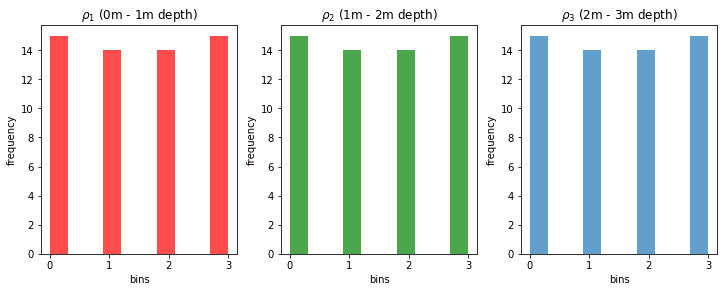

In [32]:
fig = plt.figure(figsize=(10,4))

plt.subplot(1, 3, 1)
plt.hist(rho_1_binned,color='r',alpha=0.7)
plt.title(r'$\rho_1$ (0m - 1m depth)')
plt.xlabel('bins')
plt.ylabel('frequency');

plt.subplot(1, 3, 2)
plt.hist(rho_2_binned,color='g',alpha=0.7)
plt.title(r'$\rho_2$ (1m - 2m depth)')
plt.xlabel('bins')
plt.ylabel('frequency')

plt.subplot(1, 3, 3)
plt.hist(rho_3_binned,alpha=0.7)
plt.title(r'$\rho_3$ (2m - 3m depth)')
plt.xlabel('bins')
plt.ylabel('frequency')

plt.tight_layout(pad=0.5, w_pad=1)

plt.savefig('../Data/output_figures/resistivity_distribtion.png',dpi=200)

### 3.2.6 Split Features and Target Variables for Training

In [33]:
X = data_dummy.drop(['Name','rho_1','rho_2','rho_3','RELIEF_I'], axis=1).to_numpy()
X_df = data_dummy.drop(['Name','rho_1','rho_2','rho_3','RELIEF_I'], axis=1)
print('X shape:',X.shape)

y1 = rho_1_binned
print('y1 shape:',y1.shape)
y2 = rho_2_binned
print('y2 shape:',y2.shape)
y3 = rho_3_binned
print('y3 shape:',y3.shape)

X shape: (58, 14)
y1 shape: (58,)
y2 shape: (58,)
y3 shape: (58,)


### 3.2.7 Fit Separate Decision Tree For Each Ouput Variable

In [34]:
clf1 = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
clf1.fit(X, y1)

clf2 = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
clf2.fit(X, y2)

clf3 = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
clf3.fit(X, y3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### 3.2.8 Compute Cross Validation Score for Each Decision Tree

#### 14-fold cv

In [35]:
cv = 14

cvs1 = cross_val_score(clf1, X, y1, cv=cv)
print('{:d}-fold cross validation for rho_1 (0m - 1m depth):'.format(cv))
print('cross validation scores:', cvs1)
print('average score:',np.sum(cvs1)/cv)
print()

cvs2 = cross_val_score(clf2, X, y2, cv=cv)
print('{:d}-fold cross validation for rho_2 (1m - 2m depth):'.format(cv))
print('cross validation scores:', cvs2)
print('average score:',np.sum(cvs2)/cv)
print()

cvs3 = cross_val_score(clf3, X, y3, cv=cv)
print('{:d}-fold cross validation for rho_3 (2m - 3m depth):'.format(cv))
print('cross validation scores:', cvs3)
print('average score:',np.sum(cvs3)/cv)
print()

14-fold cross validation for rho_1 (0m - 1m depth):
cross validation scores: [0.6  0.6  0.5  0.25 0.75 0.75 0.75 0.5  0.75 0.25 0.5  0.5  0.5  0.25]
average score: 0.5321428571428571

14-fold cross validation for rho_2 (1m - 2m depth):
cross validation scores: [0.2  0.4  0.5  0.5  0.25 0.   0.5  0.5  0.5  0.75 0.75 0.75 0.5  0.5 ]
average score: 0.4714285714285714

14-fold cross validation for rho_3 (2m - 3m depth):
cross validation scores: [0.2  0.2  0.25 0.75 0.75 1.   0.5  0.5  0.5  0.75 0.5  0.5  0.5  0.25]
average score: 0.5107142857142858



#### shuffle-split cv

In [36]:
from sklearn.model_selection import ShuffleSplit
n_splits = 14
cv = ShuffleSplit(n_splits=n_splits, test_size=4, random_state=0)

cvs1 = cross_val_score(clf1, X, y1, cv=cv)
print('ShuffleSplit cross validation for rho_1 (0m - 1m depth):')
print('cross validation scores:', cvs1)
print('average score:',np.sum(cvs1)/n_splits)
print()

cvs2 = cross_val_score(clf2, X, y2, cv=cv)
print('ShuffleSplit cross validation for rho_2 (1m - 2m depth):')
print('cross validation scores:', cvs2)
print('average score:',np.sum(cvs2)/n_splits)
print()

cvs3 = cross_val_score(clf3, X, y3, cv=cv)
print('ShuffleSplit cross validation for rho_3 (2m - 3m depth):')
print('cross validation scores:', cvs3)
print('average score:',np.sum(cvs3)/n_splits)
print()

ShuffleSplit cross validation for rho_1 (0m - 1m depth):
cross validation scores: [0.25 0.25 0.25 0.25 0.5  0.5  0.75 0.75 0.25 0.25 0.   0.5  0.25 0.75]
average score: 0.39285714285714285

ShuffleSplit cross validation for rho_2 (1m - 2m depth):
cross validation scores: [0.75 0.25 0.25 0.5  0.5  0.75 0.75 0.5  0.5  1.   0.25 0.75 0.5  0.25]
average score: 0.5357142857142857

ShuffleSplit cross validation for rho_3 (2m - 3m depth):
cross validation scores: [0.5  0.5  1.   1.   0.25 0.75 0.25 0.5  0.5  0.   0.25 0.5  0.5  0.75]
average score: 0.5178571428571429



### 3.2.9 View Graphical Representation of Each Decision Tree

In [37]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\Ruan Pretorius\anaconda3\envs\geopandas_env\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


rho_1 (0m - 1m):


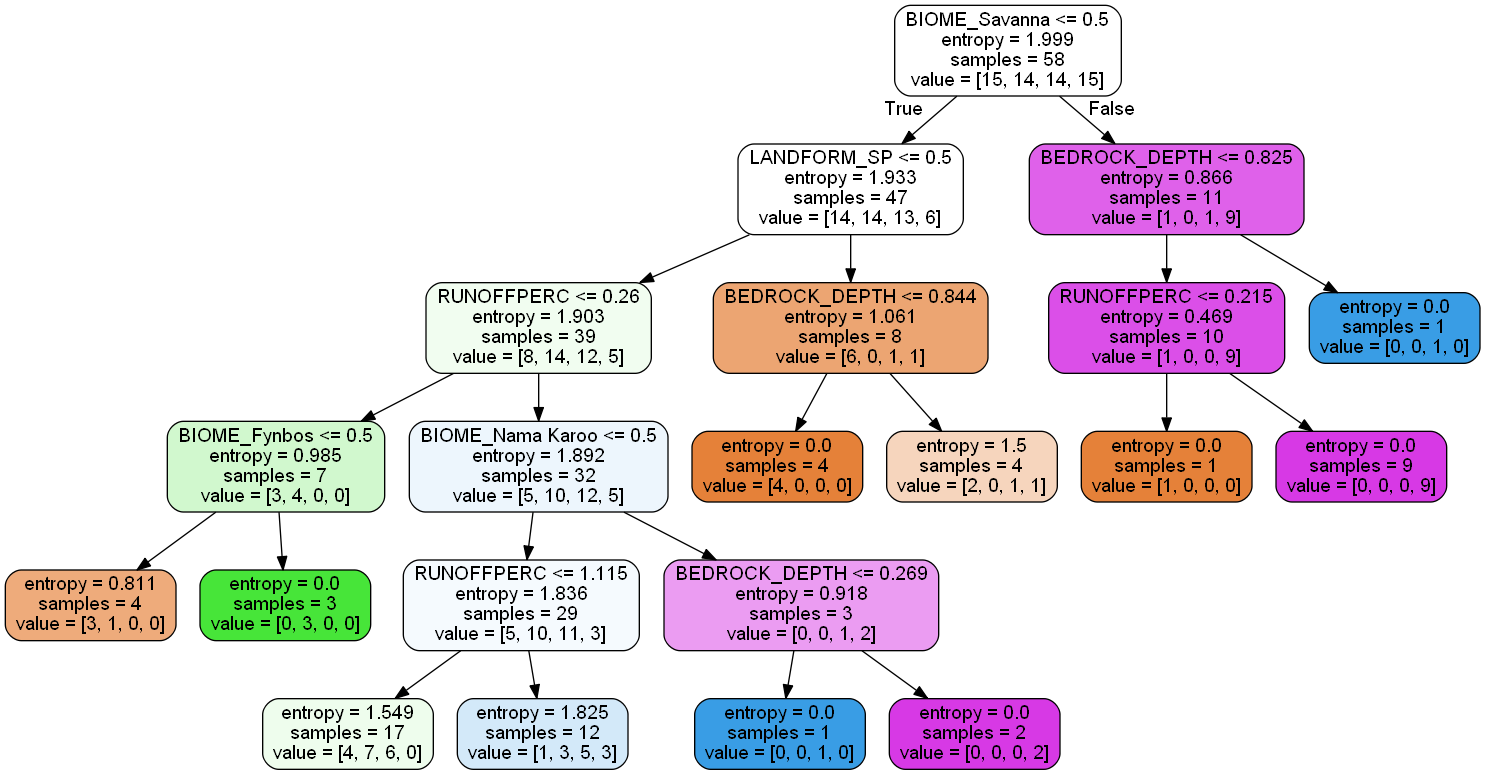

In [38]:
features = list(X_df.columns)
dot_data = StringIO()  
export_graphviz(clf1, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph1 = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph1.write_png('../Data/output_figures/soil_resistivity_tree_rho_1.png',)
print('rho_1 (0m - 1m):')
Image(graph1.create_png())

rho_2 (1m - 2m):


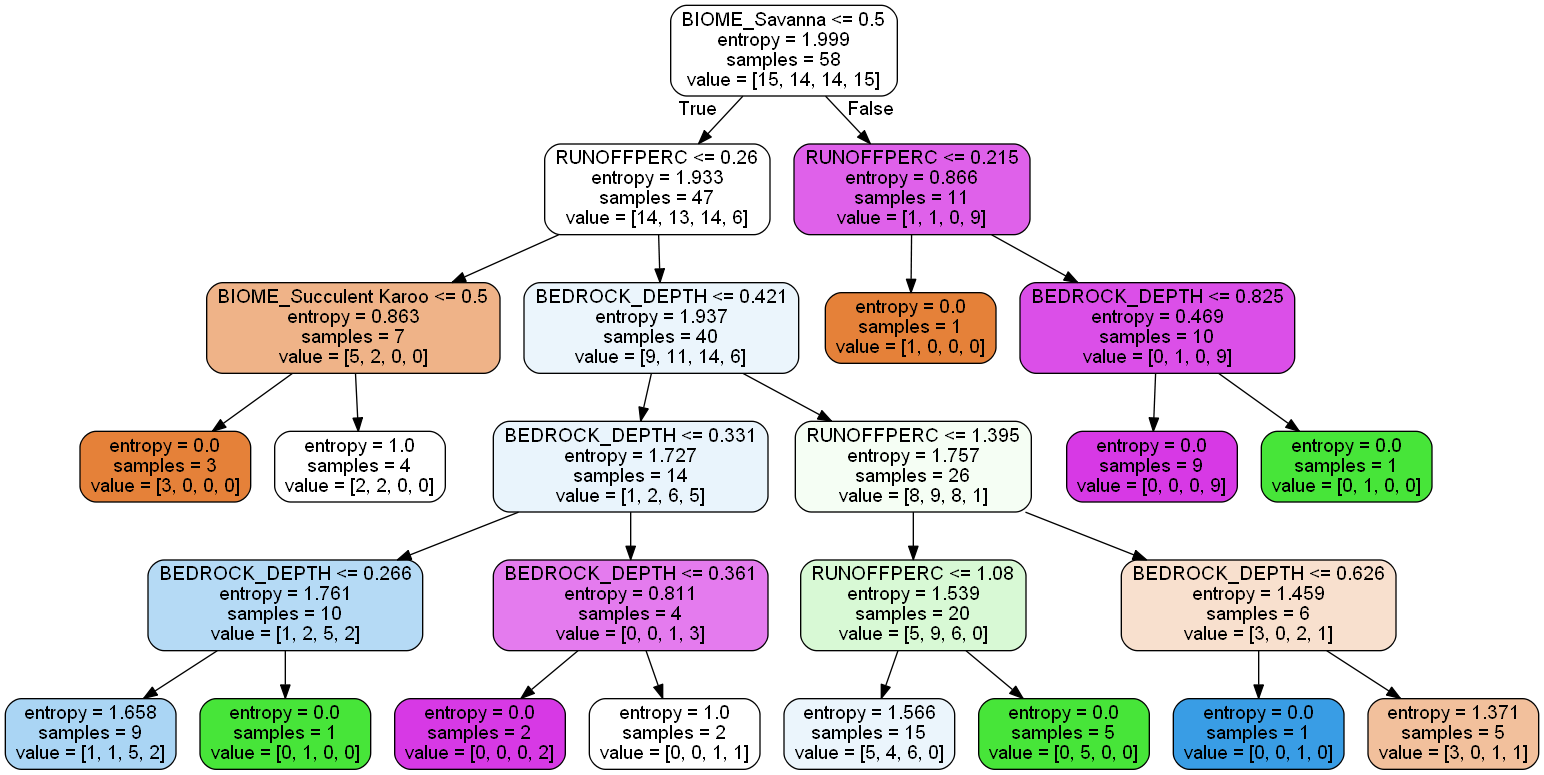

In [39]:
dot_data = StringIO() 
export_graphviz(clf2, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph2 = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph2.write_png('../Data/output_figures/soil_resistivity_tree_rho_2.png',)
print('rho_2 (1m - 2m):')
Image(graph2.create_png())

rho_3 (2m - 3m):


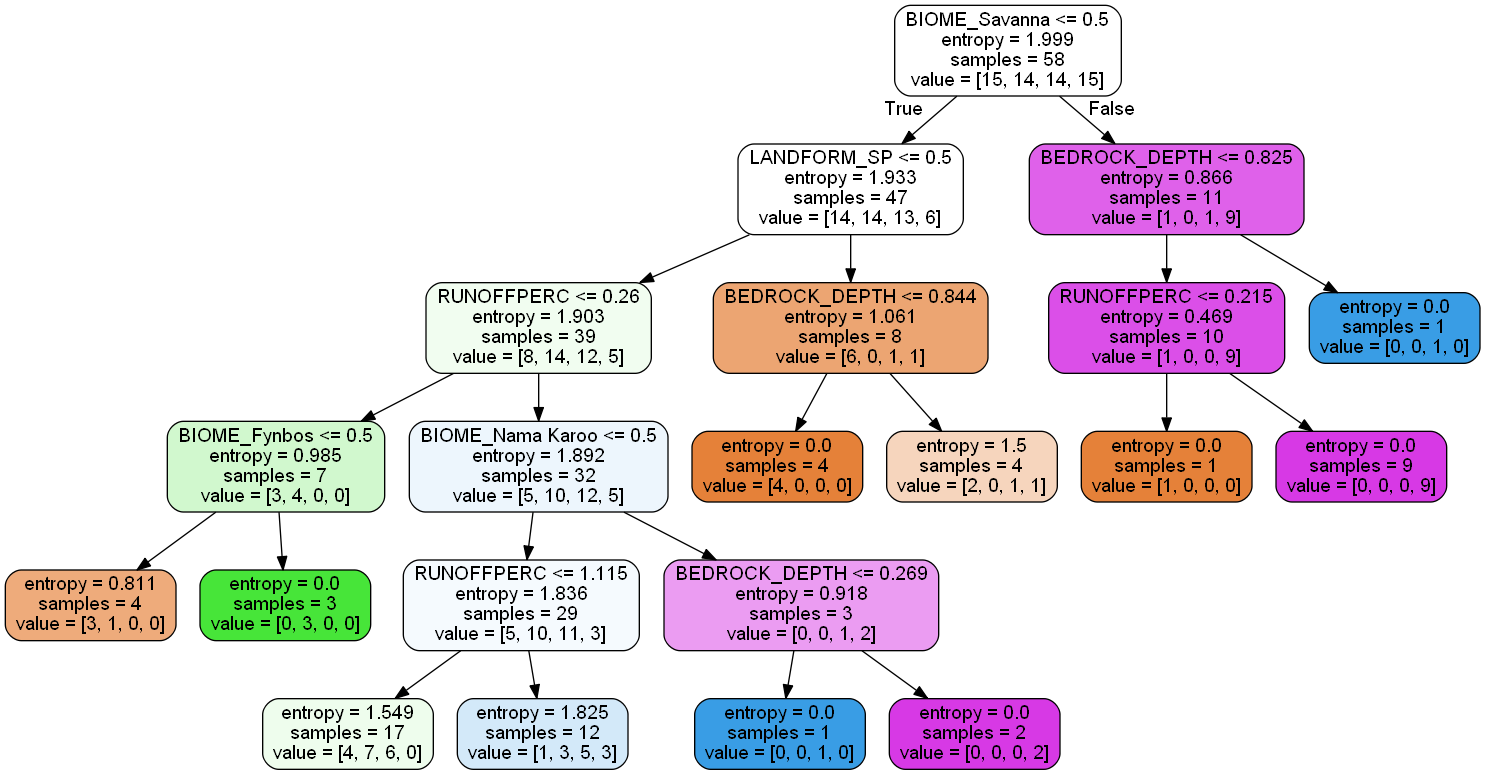

In [40]:
dot_data = StringIO()
export_graphviz(clf3, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph3 = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph3.write_png('../Data/output_figures/soil_resistivity_tree_rho_3.png',)
print('rho_3 (2m - 3m):')
Image(graph1.create_png())

# ------- END -------